## $\color{SkyBlue}{\text{Hypothesis 1}}$
#### $\color{SkyBlue}{\text{Cole Krant}}$

### Description

To what extend to a players height and weight contribute to the teams overall performance?

<br>
<br>

$\rule{27cm}{0.4pt}$ 
### Import Libraries

In [2]:
import numpy as np
import pandas as pd

$\rule{27cm}{0.4pt}$
### K-Means Algorithm

In [4]:
#--------------------------------------------------------------------------------#
def dist(x1, x2):
    return np.sqrt(np.sum(x1-x2)**2)
#--------------------------------------------------------------------------------#

In [5]:
#--------------------------------------------------------------------------------#
def kMeans(df, k=4, tol=0.05): 
    """
    Usage: input 
        df=data frame, 
        k=# of clusters
        tol=tolerance for L_2 convergance check on centroids
    """    
    #---------------------------------------#
    #-- Initialize --#
    clusters = np.zeros(len(df))
    centroids = df.sample(k).values
    mean_error = np.inf
    converged = False
    
    num_iterations = 0
    
    #---------------------------------------#
    #-- LOOP UNTIL CONVERGENCE --#
    while not(converged):
        
        #-- Cluster Assignment --#
        for index, data in enumerate(df.values):
            distances = [dist(data, centroid) for centroid in centroids]
            clusters[index] = np.argmin(distances)
        
        #-- Update Centroids --#
        updated_centroids = np.empty((k, df.shape[1]))
        for index in range(k):
            clust_data = df[clusters == index]
            centroid = clust_data.mean(axis=0)
            updated_centroids[index, :] = centroid
            
        #-- Calculate Meanerror --#
        errors = []
        for data, cluster in zip(df.values, clusters):
            centroid = updated_centroids[int(cluster)]
            errors.append(dist(data, centroid)**2)
        
        error_arr = np.array(errors)
        
        #-- Calculate Reconstruction Error --#
        rec_err = np.sum(error_arr)/len(df)
        
        #-- Check for Convergence --#
        if (abs(rec_err - mean_error) < tol):
            converged = True
#             print('Converged at iteration {} with a change of {}'.format(num_iterations, abs(rec_err - mean_error)))
        
        # Update Values
        centroids = updated_centroids
        mean_error = rec_err
        num_iterations = num_iterations + 1
        
    #---------------------------------------#
    return centroids, clusters, mean_error
#--------------------------------------------------------------------------------#

$\rule{27cm}{0.4pt}$ 
### Dataframe Composition

In [3]:
#--------------------------------------------------------------------------------#
## Statistics for each team, by season
### Basic Info
#   id
#   player name
#   team abbreviation
#   age
#   player height
#   player weight
df_seasons = pd.read_csv("data/all_seasons.csv")
df_seasons = df_seasons[["id", "player_name", "team_abbreviation", "age", "player_height", "player_weight"]]
df_seasons.head()
# print(df_seasons.shape)
#--------------------------------------------------------------------------------#

,id,player_name,team_abbreviation,age,player_height,player_weight
0,0,Randy Livingston,HOU,22.0,193.04,94.800728
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480
2,2,George Lynch,VAN,26.0,203.20,103.418976
3,3,George McCloud,LAL,30.0,203.20,102.058200
4,4,George Zidek,DEN,23.0,213.36,119.748288


In [16]:
#--------------------------------------------------------------------------------#
## Team Statistics
#   full name
#   abbreviation (id)
df_team = pd.read_csv("data/team.csv")
df_team = df_team[["full_name", "abbreviation"]]
# df_team.head()

## Rankings
#   Abbreviation (id)
#   Rank
#   Year
#   Conference
df_rankings = pd.read_csv("data/rankings.csv")
df_rankings.head()
#--------------------------------------------------------------------------------#

,Team,Rank,Year,Converence
0,Denver Nuggets*,1,2023,West
1,Memphis Grizzlies*,2,2023,West
2,Sacramento Kings*,3,2023,West
3,Phoenix Suns*,4,2023,West
4,Golden State Warriors*,5,2023,West


### Dataframe Concatenation

In [67]:
#--------------------------------------------------------------------------------#
## Master Dataframe
#   for each player
#      age
#      height
#      weight
#      full_name (team name)
#      team_abbreviation
#      rank
#      year

## Merge with Seasons
df = pd.merge(df_seasons, df_team, left_on="team_abbreviation", right_on="abbreviation")
df = df[["player_name", "team_abbreviation", "age", "player_height", "player_weight", "full_name"]]

df.head(3)

# ## Merge with Rankings
# df = pd.merge(df, df_rankings, left_on="full_name", right_on="Team")

# df.head(3)

#--------------------------------------------------------------------------------#
### Pseudocode
# Objective: create a dataframe with the following columns
#       Loop through each year
#           Create a smaller dataframe with the given year
#           Loop through each team
#               Calculate average height of the team
#               Append the team, average height, and year to the new dataframe

# # New Master Dataframe
# dict = {'Team' : [], 'Avg_Height' : [], 'Year' : [], 'Rank' : []}
# dfMaster = pd.DataFrame(dict)

# # Get all unique years and teams
# years = df["Year"].unique()                    # get all unique years
# teams = df["team_abbreviation"].unique()       # get all unique teams

# ##-- Loop through each year --##
# for year in range(len(years)):

#     # Create a smaller dataframe with the given year
#     df_year = df[df["Year"] == years[year]]

#     ##-- Loop through each team --##
#     for team in range(len(teams)):

#         # Calculate average height of the team
#         avg_height = df_year[df_year["team_abbreviation"] == teams[team]]["player_height"].mean()  # calculate average height of the team

#         # Append the team, average height, and year to the new dataframe
#         temp = {'Team' : teams[team], 'Avg_Height' : avg_height, 'Year' : years[year]}             # create a temporary dataframe
#         df_temp = pd.DataFrame(temp, index=[0])

#         dfMaster = pd.concat([dfMaster, df_temp], ignore_index = True)                             # append the temporary dataframe to the master dataframe
#         dfMaster = dfMaster.reset_index(drop=True)


# #--------------------------------------------------------------------------------#
# dfMaster.dropna(inplace=True)


#--------------------------------------------------------------------------------#
# dfMaster.merge(dfMaster, df_rankings, left_on="Team", right_on="Year")
# dfMaster.head(100)


,player_name,team_abbreviation,age,player_height,player_weight,full_name
0,Randy Livingston,HOU,22.0,193.04,94.800728,Houston Rockets
1,Hakeem Olajuwon,HOU,34.0,213.36,115.665960,Houston Rockets
2,Emanual Davis,HOU,28.0,195.58,87.996848,Houston Rockets


$\rule{27cm}{0.4pt}$ 
### Begin K-Mean Analysis

In [61]:
centroids, clusters, mean_error = kMeans(dfMaster[["Rank", "player_height"]], k=4)

print('\n    Mean Error of {}'.format(mean_error))

print('\nCentroids:')
print(centroids)

print('\nClusters:')
print(clusters)

KeyError: "None of [Index(['Rank', 'player_height'], dtype='object')] are in the [columns]"

### Plot the resulting graph

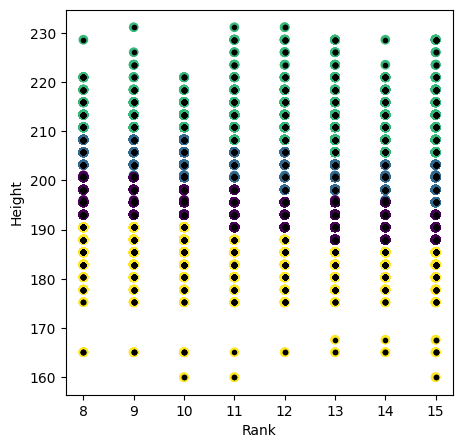

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(5,5))
plt.scatter(df[['Rank']], df[['player_height']], c = clusters)
plt.scatter(df[['Rank']], df[['player_height']], c = 'black', marker='.')
plt.xlabel("Rank")
plt.ylabel("Height")
plt.show()

In [25]:
print(clusters)

[0. 0. 0. ... 0. 0. 1.]
